In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import os
import missingno as mno
from sklearn.model_selection import train_test_split

# GET TRAINING, VALIDATION AND TESTING DATASETS

## Import the preprocessed data from pickle file

In [87]:
full_df = pd.read_pickle("C:\\Users\\Karthik\\Desktop\\PDA Assignment\\consolidated_data_file\\full_df.pkl")
full_df

,Acc_X,Acc_Y,Acc_Z,Ang_X,Ang_Y,Ang_Z,Mag_X,Mag_Y,Mag_Z,Ori_X,Ori_Y,Ori_Z,Activity
0,0.425725,0.749015,0.364511,0.490554,0.454564,0.526275,0.637193,0.482110,0.671502,0.818288,0.735858,0.933766,walk
1,0.458704,0.739668,0.375706,0.624813,0.538675,0.472815,0.661625,0.452866,0.674476,0.844175,0.805819,0.922696,walk
2,0.522290,0.680900,0.397175,0.728672,0.577598,0.530146,0.652226,0.459977,0.661484,0.166425,0.824256,0.644686,walk
3,0.376335,0.700094,0.341182,0.665626,0.541962,0.502235,0.651708,0.474157,0.618071,0.248977,0.653631,0.595641,walk
4,0.429935,0.766268,0.355614,0.472058,0.501679,0.433311,0.652571,0.469739,0.591608,0.254888,0.705816,0.600869,walk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,0.370616,0.876166,0.376610,0.518573,0.551863,0.514045,0.371081,0.602537,0.451018,0.533223,0.917894,0.212381,jump
32996,0.316083,0.685169,0.373187,0.585530,0.712233,0.679879,0.536104,0.607819,0.423461,0.052635,0.808250,0.754440,jump
32997,0.442224,0.709959,0.400724,0.558014,0.449132,0.385617,0.487309,0.624514,0.437015,0.992253,0.887553,0.794422,jump
32998,0.423344,0.777419,0.363056,0.589959,0.435359,0.412791,0.433327,0.596766,0.398733,0.236703,0.923347,0.534992,jump


## Defining a function to get training, validation and testing data
* We define the function to use a list of dataframes
* This is because we want data for all activities to be present in all - test, val and training datasets
* when calling the fucntion we will split out full_df into dfs of separate activities and call this function

In [88]:
def get_training_validation_and_testing_data_from_list_of_dataframes(list_of_dfs):
    temp_X_train_list = []
    temp_X_val_list = []
    temp_X_test_list = []
    temp_Y_train_list = []
    temp_Y_val_list = []
    temp_Y_test_list = []

    for dtf in list_of_dfs:
        temp_X = dtf.iloc[:, 0:12]
        temp_y = dtf.iloc[:, 12:]
        
        #Get training, validation and testing data
        temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(temp_X, temp_y, test_size=0.2, random_state=1)
        temp_X_train, temp_X_val, temp_y_train, temp_y_val = train_test_split(temp_X_train, temp_y_train, test_size=0.2, random_state=1)
        
        temp_X_train_list.append(temp_X_train)
        temp_X_val_list.append(temp_X_val)
        temp_X_test_list.append(temp_X_test)
        temp_Y_train_list.append(temp_y_train)
        temp_Y_val_list.append(temp_y_val)
        temp_Y_test_list.append(temp_y_test)
       
    X_train = pd.concat(temp_X_train_list, ignore_index=True)
    X_val = pd.concat(temp_X_val_list, ignore_index=True)
    X_test = pd.concat(temp_X_test_list, ignore_index=True)
    y_train = pd.concat(temp_Y_train_list, ignore_index=True)
    y_val = pd.concat(temp_Y_val_list, ignore_index=True)
    y_test = pd.concat(temp_Y_test_list, ignore_index=True)
        
    return X_train, X_val, X_test, y_train, y_val, y_test

In [89]:
#-----Get training, validation and testing data from the above files
list_of_dtfs = [full_df.query('Activity == "walk"'), full_df.query('Activity == "jog"'), full_df.query('Activity == "jump"')]
X_train, X_val, X_test, y_train, y_val, y_test = get_training_validation_and_testing_data_from_list_of_dataframes(list_of_dtfs)

#-----write the above data to an excel for any backtracking purpose
output_file_path = r'C:\Users\Karthik\Desktop\PDA Assignment\Training and testing data'
output_writer = pd.ExcelWriter(f'{output_file_path}\Training_and_Testing_Datasets_for_ANN.xlsx')
X_train.to_excel(output_writer, sheet_name='X_training', index=False)
X_val.to_excel(output_writer, sheet_name='X_validation', index=False)
X_test.to_excel(output_writer, sheet_name='X_testing', index=False)
y_train.to_excel(output_writer, sheet_name='y_training', index=False)
y_val.to_excel(output_writer, sheet_name='y_validation', index=False)
y_test.to_excel(output_writer, sheet_name='y_testing', index=False)
output_writer.save()

print(X_train, y_train)

          Acc_X     Acc_Y     Acc_Z     Ang_X     Ang_Y     Ang_Z     Mag_X  \
0      0.621738  0.796360  0.343001  0.556286  0.498260  0.500891  0.076586   
1      0.369184  0.719453  0.378134  0.572641  0.495842  0.485034  0.313426   
2      0.387307  0.737753  0.370946  0.543756  0.499033  0.436626  0.569559   
3      0.357110  0.722598  0.378280  0.589172  0.479643  0.507088  0.549841   
4      0.391150  0.778063  0.401312  0.516649  0.515962  0.498989  0.558550   
...         ...       ...       ...       ...       ...       ...       ...   
21115  0.453051  0.929452  0.357637  0.562560  0.501711  0.431791  0.600037   
21116  0.526403  0.733250  0.310974  0.452900  0.599335  0.421100  0.283050   
21117  0.423846  0.825660  0.316001  0.588215  0.447835  0.452516  0.605431   
21118  0.523329  0.450848  0.356761  0.514745  0.555014  0.403047  0.381450   
21119  0.660988  0.602384  0.382430  0.614572  0.459845  0.511015  0.534364   

          Mag_Y     Mag_Z     Ori_X     Ori_Y     O

## Processing the training, validation and testing datasets
* The standard format of input to keras is array - so we will be converting all inputs and outputs as numpy arrays
* All columns will be converted to float32

In [90]:
from sklearn import preprocessing
from keras.utils import np_utils

#-----convert the input dataframes into an array as kera's requires inputs to be arrays
X_train_enc = X_train.to_numpy().astype(np.float32)
X_val_enc = X_val.to_numpy().astype(np.float32)
X_test_enc = X_test.to_numpy().astype(np.float32)


#-----one hot encode the output as this is a multiclass classification problem
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_le = le.transform(y_train)
y_val_le = le.transform(y_val)
y_test_le = le.transform(y_test)

#-----
y_train_dummies = pd.get_dummies(y_train_le)
y_val_dummies = pd.get_dummies(y_val_le)
y_test_dummies = pd.get_dummies(y_test_le)

#-----convert the one hot encoded outputs to an array as kera's requires inputs to be arrays
y_train_enc = y_train_dummies.to_numpy().astype(np.float32)
y_val_enc = y_val_dummies.to_numpy().astype(np.float32)
y_test_enc = y_test_dummies.to_numpy().astype(np.float32)

print(le.inverse_transform([0,1,2]))


['jog' 'jump' 'walk']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [91]:
print(X_train_enc.shape)
print(y_train_enc.shape)
print(X_train_enc)
print(y_train_enc)

(21120, 12)
(21120, 3)
[[0.6217385  0.7963598  0.34300137 ... 0.63855386 0.0804014  0.19714974]
 [0.3691843  0.71945304 0.3781342  ... 0.71214724 0.85759854 0.40475214]
 [0.38730672 0.7377531  0.37094602 ... 0.6432307  0.85255736 0.6835628 ]
 ...
 [0.42384562 0.8256598  0.31600133 ... 0.44420198 0.82262117 0.3082147 ]
 [0.5233294  0.450848   0.35676083 ... 0.8553832  0.86270714 0.20753288]
 [0.66098815 0.60238415 0.3824305  ... 0.34336513 0.73132014 0.25030446]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


# DEFINE AND IMPLEMENT A SIMPLE NN CLASSIFICATION MODEL
* Output layer should use softmax function because this is a multiclass classification problem

## Trial Run
* We define a NN and fit and predict the testing dataset to see the performance

In [92]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, KFold

def get_nn_simplemodel(n_inputs, n_outputs, optimizerinput='adam', n_neurons=2000):
    # create model
    model = Sequential()
    model.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(n_neurons, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizerinput, metrics=["accuracy"])
    return model

In [93]:
m = get_nn_simplemodel(n_inputs=12, n_outputs=3)
m.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_199 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_200 (Dense)            (None, 2000)              26000     
_________________________________________________________________
dense_201 (Dense)            (None, 3)                 6003      
Total params: 32,159
Trainable params: 32,159
Non-trainable params: 0
_________________________________________________________________


## Model fit

In [94]:
n_in=X_train.shape[1]
n_out=y_train.shape[1]

classifier_model = get_nn_simplemodel(n_inputs=n_in, n_outputs=n_out, optimizerinput='adam')
classifier_model.fit(X_train_enc, y_train_enc, batch_size=100, epochs=50, validation_data=(X_val_enc, y_val_enc))

Epoch 1/50
212/212 [==============================] - 1s 2ms/step - loss: 1.0696 - accuracy: 0.4128 - val_loss: 0.9517 - val_accuracy: 0.5095
Epoch 2/50
212/212 [==============================] - 0s 1ms/step - loss: 0.9286 - accuracy: 0.5438 - val_loss: 0.8748 - val_accuracy: 0.5873
Epoch 3/50
212/212 [==============================] - 0s 1ms/step - loss: 0.8812 - accuracy: 0.5793 - val_loss: 0.8393 - val_accuracy: 0.6127
Epoch 4/50
212/212 [==============================] - 0s 1ms/step - loss: 0.8475 - accuracy: 0.6041 - val_loss: 0.8259 - val_accuracy: 0.6250
Epoch 5/50
212/212 [==============================] - 0s 1ms/step - loss: 0.8329 - accuracy: 0.6124 - val_loss: 0.8037 - val_accuracy: 0.6369
Epoch 6/50
212/212 [==============================] - 0s 1ms/step - loss: 0.8056 - accuracy: 0.6328 - val_loss: 0.8016 - val_accuracy: 0.6299
Epoch 7/50
212/212 [==============================] - 0s 1ms/step - loss: 0.7883 - accuracy: 0.6488 - val_loss: 0.7732 - val_accuracy: 0.6506
Epoch 

## Predict using the trian run model and plot confusion matrix

In [95]:
y_preds = classifier_model.predict(X_test_enc)
predicted_classes = np.argmax(y_preds,axis=1)
expected_classes = np.argmax(y_test_enc,axis=1)
print(predicted_classes,'\n' ,expected_classes)

[2 2 1 ... 1 1 1] 
 [2 2 2 ... 1 1 1]


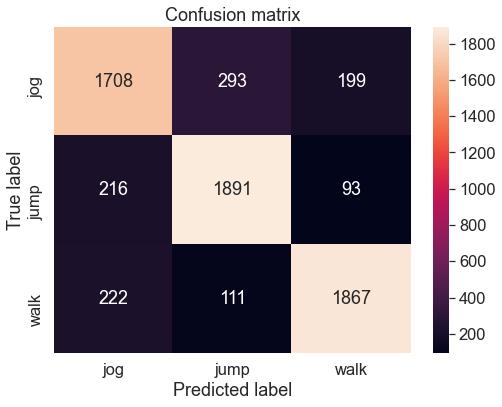

In [96]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_true=expected_classes, y_pred=predicted_classes)
labels = ['jog', 'jump', 'walk']
plt.figure(figsize=(8,6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_mat, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# HYPERPARAMETER TUNING AND OPTIMIZING THE ANN

## Tune epoch and batch size

In [350]:
# create model
model = KerasClassifier(build_fn=get_nn_simplemodel, n_inputs=12, n_outputs=3, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_enc, y_train_enc)

# summarize results
print(grid_result)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000016948DD9F70>,
             n_jobs=-1,
             param_grid={'batch_size': [16, 32, 64], 'epochs': [50, 100, 200]})
Best: 0.659239 using {'batch_size': 32, 'epochs': 200}
0.508069 (0.192126) with: {'batch_size': 16, 'epochs': 50}
0.629103 (0.269853) with: {'batch_size': 16, 'epochs': 100}
0.638289 (0.264194) with: {'batch_size': 16, 'epochs': 200}
0.570648 (0.224414) with: {'batch_size': 32, 'epochs': 50}
0.554900 (0.206259) with: {'batch_size': 32, 'epochs': 100}
0.659239 (0.274004) with: {'batch_size': 32, 'epochs': 200}
0.466006 (0.151318) with: {'batch_size': 64, 'epochs': 50}
0.584671 (0.244405) with: {'batch_size': 64, 'epochs': 100}
0.651771 (0.271211) with: {'batch_size': 64, 'epochs': 200}


# Tune optimizer

In [351]:
# create model
model = KerasClassifier(build_fn=get_nn_simplemodel, n_inputs=12, n_outputs=3, epochs=200, batch_size=32, verbose=0)
#model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
optimizer = ['RMSprop', 'Adam', 'Nadam']
param_grid = dict(optimizerinput=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_enc, y_train_enc)

# summarize results
print(grid_result)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000016994D82880>,
             n_jobs=-1,
             param_grid={'optimizerinput': ['RMSprop', 'Adam', 'Nadam']})
Best: 0.666198 using {'optimizerinput': 'Nadam'}
0.616328 (0.243383) with: {'optimizerinput': 'RMSprop'}
0.645959 (0.271144) with: {'optimizerinput': 'Adam'}
0.666198 (0.284426) with: {'optimizerinput': 'Nadam'}


## Tune number of neurons

In [9]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, f1_score

# create model
model = KerasClassifier(build_fn=get_nn_simplemodel, n_inputs=12, n_outputs=3, optimizerinput='Nadam', epochs=200, batch_size=32, verbose=0)

# define the grid search parameters
nn_neurons = [2000, 3000]
param_grid = dict(n_neurons=nn_neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_enc, y_train_enc)

# summarize results
print(grid_result)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000002216A033670>,
             n_jobs=-1, param_grid={'n_neurons': [2000, 3000]})
Best: 0.675052 using {'n_neurons': 3000}
0.665895 (0.286691) with: {'n_neurons': 2000}
0.675052 (0.287053) with: {'n_neurons': 3000}


## Evaluate the model using KFold cross validation

In [ ]:
n_in = X_train_enc.shape[1]
n_out = y_train_enc.shape[1]

#Get error using cross validation
estimator = KerasClassifier(build_fn=get_nn_simplemodel, n_inputs=n_in, n_outputs=n_out, optimizerinput='Nadam', n_neurons=3000, epochs=200, batch_size=32, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train_enc, y_train_enc, cv=kfold)
# print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [14]:
print("Mean Score: %.2f, Std. Dev: (%.2f)" % (results.mean(), results.std()))

Mean Score: 0.95, Std. Dev: (0.02)


In [97]:
n_in = X_train_enc.shape[1]
n_out = y_train_enc.shape[1]

tuned_classifier_model = get_nn_simplemodel(n_inputs=n_in, n_outputs=n_out, optimizerinput='Nadam', n_neurons=3000)
history = tuned_classifier_model.fit(X_train_enc, y_train_enc, batch_size=32, epochs=200, validation_data=(X_val_enc, y_val_enc), verbose=1)

Epoch 1/200
660/660 [==============================] - 1s 1ms/step - loss: 1.0095 - accuracy: 0.4629 - val_loss: 0.8529 - val_accuracy: 0.5890
Epoch 2/200
660/660 [==============================] - 1s 1ms/step - loss: 0.8615 - accuracy: 0.5825 - val_loss: 0.7574 - val_accuracy: 0.6794
Epoch 3/200
660/660 [==============================] - 1s 1ms/step - loss: 0.7535 - accuracy: 0.6749 - val_loss: 0.6853 - val_accuracy: 0.7080
Epoch 4/200
660/660 [==============================] - 1s 1ms/step - loss: 0.6745 - accuracy: 0.7170 - val_loss: 0.6191 - val_accuracy: 0.7511
Epoch 5/200
660/660 [==============================] - 1s 1ms/step - loss: 0.6102 - accuracy: 0.7475 - val_loss: 0.5806 - val_accuracy: 0.7714
Epoch 6/200
660/660 [==============================] - 1s 1ms/step - loss: 0.5608 - accuracy: 0.7711 - val_loss: 0.5239 - val_accuracy: 0.8000
Epoch 7/200
660/660 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7838 - val_loss: 0.5044 - val_accuracy: 0.8097

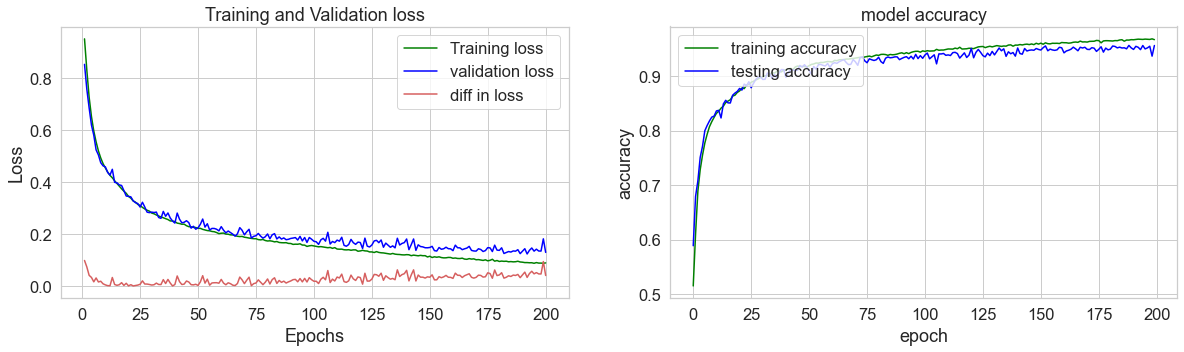

In [98]:
# Code to create graph for train vs validation error for different epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
diff_in_loss=abs(np.subtract(loss_val,loss_train));
df = pd.DataFrame({'loss_train':loss_train, 'loss_val':loss_val, 'diff_in_loss':diff_in_loss})
# print(df.head(10))
fig = plt.figure(figsize=(20,5))
epochs = range(1,len(loss_train)+1)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_train, color='green', label='Training loss')
plt.plot(epochs, loss_val, color='blue', label='validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='green')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'testing accuracy'], loc='upper left')
plt.show()


## Analysis of the above plot
* Both training and validation loss are decreasing even at 200 epochs - so the model requires more epochs
* The validation curve is noisy but the loss is higher than that of the training
    * The reason for this could be the small batch size - small batch sizes result in noisy/ jittery validation curves
    * We can also try and play with Dropout values, learning rate and check to see if ti imapcts the curve positively


## Let us check if increasing the batch size and epoch will optimize the model further

### Trial 1

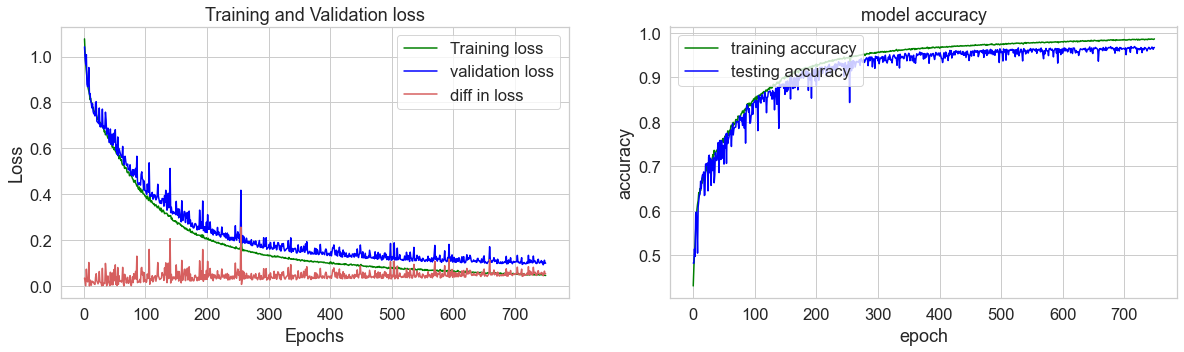

In [99]:
from keras import optimizers
from keras.layers import Dropout

def get_nn_simplemodel(n_inputs, n_outputs, optimizerinput='adam', n_neurons=2000):
    # create model
    model = Sequential()
    model.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.0001))
    model.add(layers.Dense(n_neurons, activation='relu'))
    model.add(Dropout(0.0001))
    model.add(layers.Dense(3, activation='softmax'))
    opti = optimizers.Nadam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizerinput, metrics=["accuracy"])
    return model

tuned_classifier_model = get_nn_simplemodel(n_inputs=n_in, n_outputs=n_out, optimizerinput='Nadam', n_neurons=3000)
history = tuned_classifier_model.fit(X_train_enc, y_train_enc, batch_size=750, epochs=750, validation_data=(X_val_enc, y_val_enc), verbose=0)

# Code to create graph for train vs validation error for different epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
diff_in_loss=abs(np.subtract(loss_val,loss_train));
df = pd.DataFrame({'loss_train':loss_train, 'loss_val':loss_val, 'diff_in_loss':diff_in_loss})
# print(df.head(10))
fig = plt.figure(figsize=(20,5))
epochs = range(1,len(loss_train)+1)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_train, color='green', label='Training loss')
plt.plot(epochs, loss_val, color='blue', label='validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='green')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'testing accuracy'], loc='upper left')
plt.show()

## Trial 2

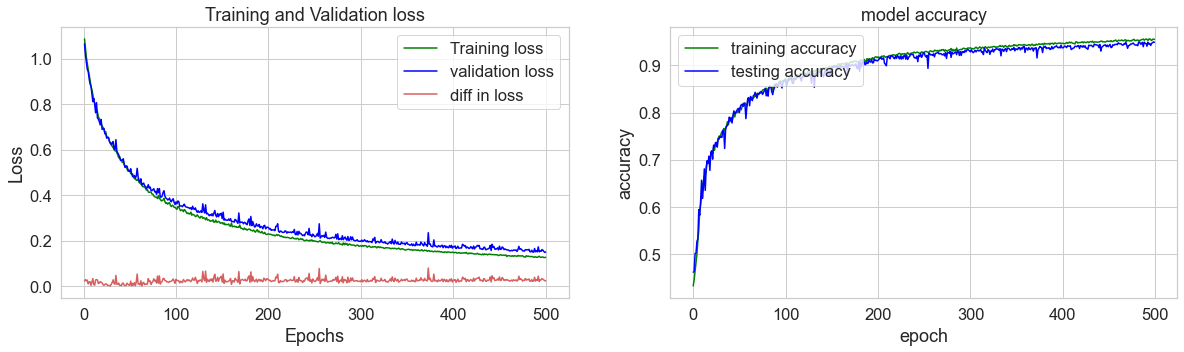

In [104]:
from keras import optimizers
from keras.layers import Dropout

def get_nn_simplemodel(n_inputs, n_outputs, optimizerinput='adam', n_neurons=2000):
    # create model
    model = Sequential()
    model.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
#     model.add(Dropout(0.0001))
    model.add(layers.Dense(n_neurons, activation='relu'))
    model.add(Dropout(0.1))
    model.add(layers.Dense(3, activation='softmax'))
#     opti = optimizers.Nadam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizerinput, metrics=["accuracy"])
    return model

tuned_classifier_model_1 = get_nn_simplemodel(n_inputs=n_in, n_outputs=n_out, optimizerinput='Nadam', n_neurons=2000)
history = tuned_classifier_model_1.fit(X_train_enc, y_train_enc, batch_size=900, epochs=500, validation_data=(X_val_enc, y_val_enc), verbose=0)

# Code to create graph for train vs validation error for different epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
diff_in_loss=abs(np.subtract(loss_val,loss_train));
df = pd.DataFrame({'loss_train':loss_train, 'loss_val':loss_val, 'diff_in_loss':diff_in_loss})
# print(df.head(10))
fig = plt.figure(figsize=(20,5))
epochs = range(1,len(loss_train)+1)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_train, color='green', label='Training loss')
plt.plot(epochs, loss_val, color='blue', label='validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='green')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'testing accuracy'], loc='upper left')
plt.show()

## Trial 3

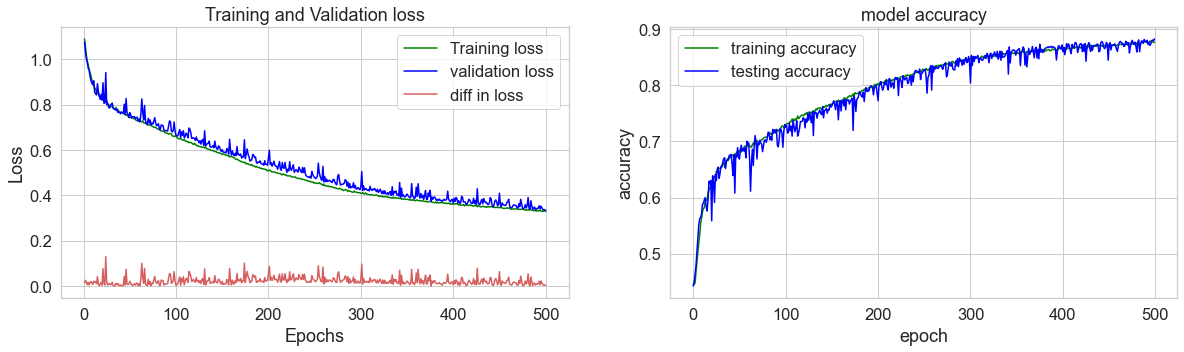

In [105]:
from keras import optimizers
from keras.layers import Dropout

def get_nn_simplemodel(n_inputs, n_outputs, optimizerinput='adam', n_neurons=1500):
    # create model
    model = Sequential()
    model.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
#     model.add(Dropout(0.001))
    model.add(layers.Dense(n_neurons, activation='relu'))
    model.add(Dropout(0.1))
    model.add(layers.Dense(3, activation='softmax'))
    opti = optimizers.Nadam(lr=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizerinput, metrics=["accuracy"])
    return model

tuned_classifier_model_2 = get_nn_simplemodel(n_inputs=n_in, n_outputs=n_out, optimizerinput='Nadam', n_neurons=900)
history = tuned_classifier_model_2.fit(X_train_enc, y_train_enc, batch_size=1000, epochs=500, validation_data=(X_val_enc, y_val_enc), verbose=0)
# Code to create graph for train vs validation error for different epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
diff_in_loss=abs(np.subtract(loss_val,loss_train));
df = pd.DataFrame({'loss_train':loss_train, 'loss_val':loss_val, 'diff_in_loss':diff_in_loss})
# print(df.head(10))
fig = plt.figure(figsize=(20,5))
epochs = range(1,len(loss_train)+1)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_train, color='green', label='Training loss')
plt.plot(epochs, loss_val, color='blue', label='validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='green')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'testing accuracy'], loc='upper left')
plt.show()

## Trial 4

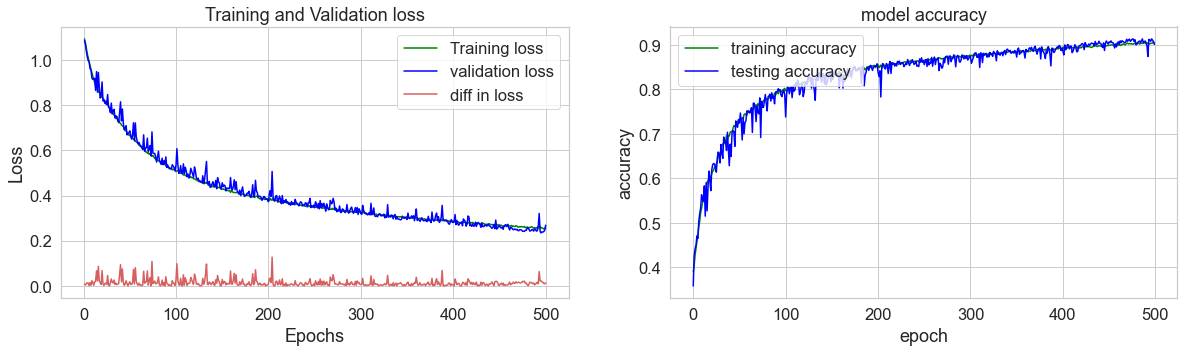

In [112]:
from keras import optimizers
from keras.layers import Dropout

def get_nn_simplemodel(n_inputs, n_outputs, optimizerinput='adam', n_neurons=1500):
    # create model
    model = Sequential()
    model.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(n_neurons, activation='relu'))
    model.add(Dropout(0.5))
    model.add(layers.Dense(3, activation='softmax'))
    opti = optimizers.Nadam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opti, metrics=["accuracy"])
    return model

tuned_classifier_model_3 = get_nn_simplemodel(n_inputs=n_in, n_outputs=n_out, optimizerinput='Nadam', n_neurons=2200)
history = tuned_classifier_model_3.fit(X_train_enc, y_train_enc, batch_size=1000, epochs=500, validation_data=(X_val_enc, y_val_enc), verbose=0)
# Code to create graph for train vs validation error for different epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
diff_in_loss=abs(np.subtract(loss_val,loss_train));
df = pd.DataFrame({'loss_train':loss_train, 'loss_val':loss_val, 'diff_in_loss':diff_in_loss})
# print(df.head(10))
fig = plt.figure(figsize=(20,5))
epochs = range(1,len(loss_train)+1)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_train, color='green', label='Training loss')
plt.plot(epochs, loss_val, color='blue', label='validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='green')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'testing accuracy'], loc='upper left')
plt.show()

## Finalized model
* Out of allthe trials, Trial 2 has the best learning curves

In [113]:
from keras import optimizers
from keras.layers import Dropout

def get_nn_simplemodel(n_inputs, n_outputs, optimizerinput='Nadam', n_neurons=2000):
    # create model
    model = Sequential()
    model.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(n_neurons, activation='relu'))
    model.add(Dropout(0.1))
    model.add(layers.Dense(3, activation='softmax'))
#     opti = optimizers.Nadam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizerinput, metrics=["accuracy"])
    return model

final_model = get_nn_simplemodel(n_inputs=n_in, n_outputs=n_out, optimizerinput='Nadam', n_neurons=2000)
print(final_model.summary())

history = final_model.fit(X_train_enc, y_train_enc, batch_size=900, epochs=500, validation_data=(X_val_enc, y_val_enc), verbose=0)

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_250 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_251 (Dense)            (None, 2000)              26000     
_________________________________________________________________
dropout_63 (Dropout)         (None, 2000)              0         
_________________________________________________________________
dense_252 (Dense)            (None, 3)                 6003      
Total params: 32,159
Trainable params: 32,159
Non-trainable params: 0
_________________________________________________________________
None


## Predict and compute metrics

In [114]:
y_preds = tuned_classifier_model.predict(X_test_enc)
predicted_classes = np.argmax(y_preds,axis=1)
expected_classes = np.argmax(y_test_enc,axis=1)
# print(predicted_classes,'\n' ,expected_classes)

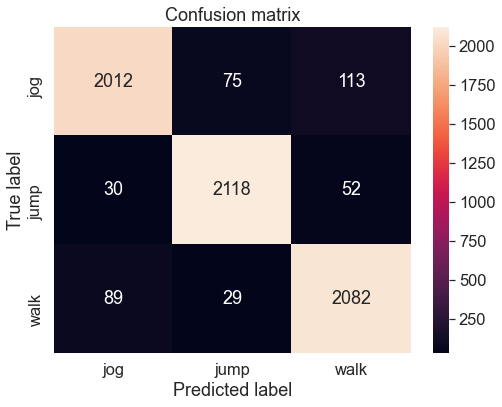

In [115]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_true=expected_classes, y_pred=predicted_classes)
labels = ['jog', 'jump', 'walk']
plt.figure(figsize=(8,6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_mat, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [116]:
from sklearn.metrics import accuracy_score, roc_auc_score, auc, classification_report
from sklearn import metrics

score = accuracy_score(expected_classes, predicted_classes)
print("Accuracy score: ", score, '\n')

score = metrics.log_loss(y_test, y_preds)
print("Log loss score: ",score, '\n')

print("ROC One vs Rest: ", roc_auc_score(y_test_enc, y_preds, multi_class="ovr"), '\n')

print(classification_report(expected_classes, predicted_classes, target_names=['jog', 'jump', 'walk']))

Accuracy score:  0.9412121212121212 

Log loss score:  0.1669263211756961 

ROC One vs Rest:  0.9909575413223141 

              precision    recall  f1-score   support

         jog       0.94      0.91      0.93      2200
        jump       0.95      0.96      0.96      2200
        walk       0.93      0.95      0.94      2200

    accuracy                           0.94      6600
   macro avg       0.94      0.94      0.94      6600
weighted avg       0.94      0.94      0.94      6600

